In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

C:\Users\82109\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import os
os.chdir('C:/Users/82109/Desktop')

In [3]:
# 기본 설정 읽기
import matplotlib.pyplot as plt

# size, family
print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정되어있는 폰트 사이즈
10.0
# 설정되어있는 폰트 글꼴
['sans-serif']


In [4]:
import platform
platform.system()

'Windows'

In [5]:
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

In [6]:
plt.rcParams['font.family']

['Malgun Gothic']

In [7]:
df = pd.read_excel('Data_0914.xlsx')

In [5]:
df.info()
# date : 방송일시
# exposer : 노출분
# mot_code : 마더코드
# product_code : 상품코드
# product_name : 상품명
# group : 상품군
# product_detail : 상품소분류
# brand : 브랜드
# price : 판매단가
# tot_price : 취급액
# sales : 판매수량
# hour : 방송시간대
# dow : 요일(day of week)
# group_dow : 요일그룹
# ratings : 최대 시청률
# early : 조기마감여부
# month : 방송월
# season : 방송계절
# day_night : 시간대그룹
# group_time1 : 시간대등급1
# group_time2 : 시간대등급2
# group_exposure : 노출빈도그룹
# detail : 디테일
# temperature : 평균기온
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38300 entries, 0 to 38299
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            38300 non-null  object 
 1   exposure        38300 non-null  int64  
 2   mot_code        38300 non-null  int64  
 3   product_code    38300 non-null  int64  
 4   product_name    38300 non-null  object 
 5   group           38300 non-null  object 
 6   product_detail  38300 non-null  object 
 7   brand           38300 non-null  object 
 8   price           38300 non-null  int64  
 9   tot_price       38300 non-null  int64  
 10  sales           38300 non-null  float64
 11  hour            38300 non-null  int64  
 12  dow             38300 non-null  object 
 13  group_dow       38300 non-null  int64  
 14  ratings         38300 non-null  float64
 15  early           38300 non-null  int64  
 16  month           38300 non-null  int64  
 17  season          38300 non-null 

In [8]:
df1 = pd.read_excel('data.xlsx')
df2 = pd.read_excel('df_train.xlsx')

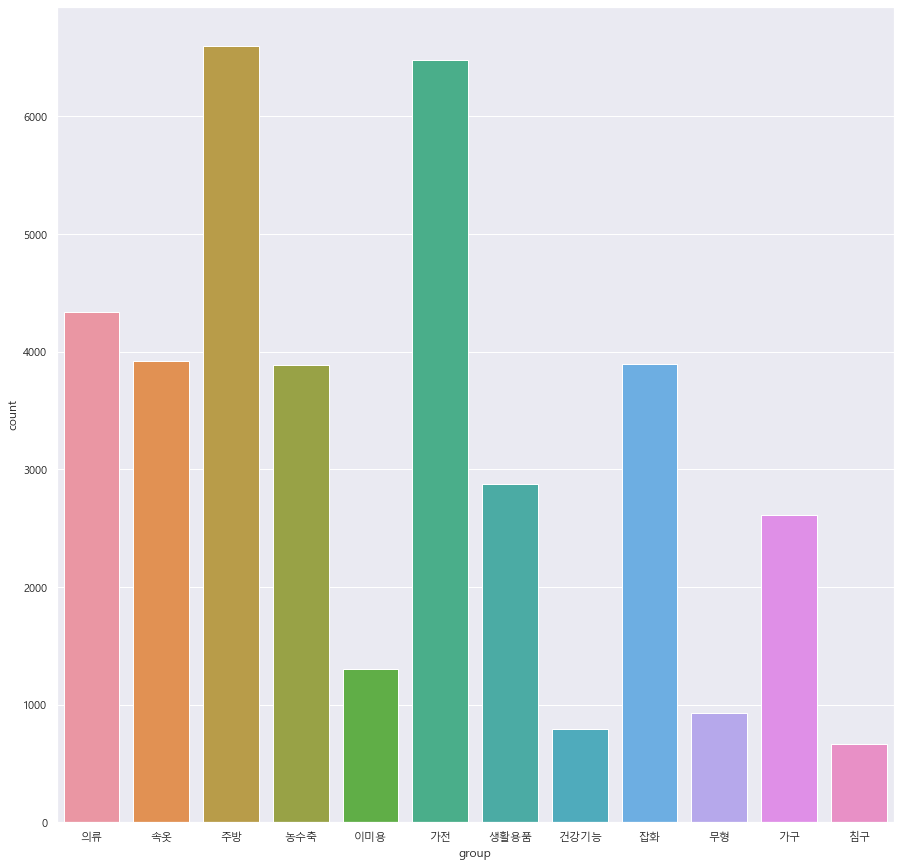

In [41]:
plt.figure(figsize = (15,15))
sns.countplot(data=df, x='group') # 상품 군 빈도수

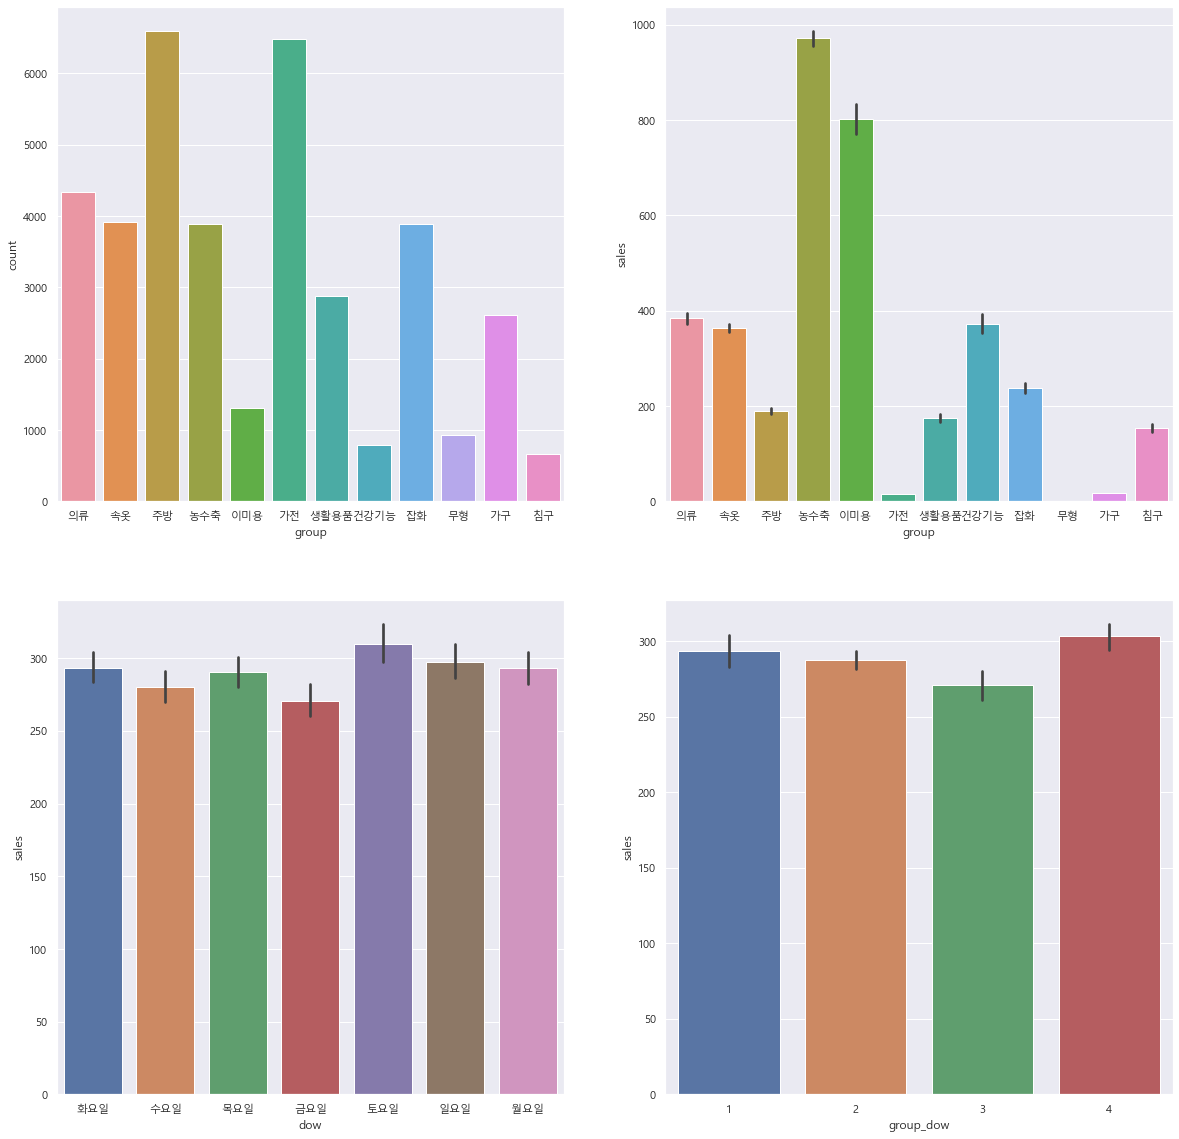

In [39]:
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
sns.countplot(data=df, x='group') # 상품 군 빈도수
plt.subplot(2,2,2)
sns.barplot(x='group', y='sales', data=df) # 상품 군 별 판매수량
plt.subplot(2,2,3)
sns.barplot(x = 'dow',y = 'sales', data = df) # 요일 별 판매수량
plt.subplot(2,2,4)
sns.barplot(x = 'group_dow',y = 'sales', data = df) # 요일그룹 별 판매수량

In [74]:
cl = df[['판매단가']]
cl.shape

(35378, 1)

In [75]:
cl.describe()

,판매단가
count,3.537800e+04
mean,3.878541e+05
std,6.264218e+05
min,1.280000e+04
25%,5.900000e+04
50%,9.900000e+04
75%,3.990000e+05
max,7.930000e+06


In [41]:
cl['단가_scale'] = (cl['판매단가'] - min(cl['판매단가']))/(max(cl['판매단가']) - min(cl['판매단가']))

<ipython-input-41-aeb7fd9c6d6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl['단가_scale'] = (cl['판매단가'] - min(cl['판매단가']))/(max(cl['판매단가']) - min(cl['판매단가']))


In [45]:
cl['취급액_scale'] = (cl['취급액'] - min(cl['취급액']))/(max(cl['취급액']) - min(cl['취급액']))

<ipython-input-45-26c4cccd4d51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl['취급액_scale'] = (cl['취급액'] - min(cl['취급액']))/(max(cl['취급액']) - min(cl['취급액']))


In [66]:
sc = StandardScaler()

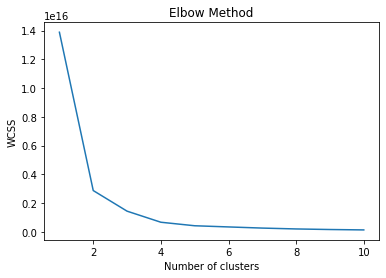

In [76]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cl)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [142]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(cl)

In [143]:
df['단가_cluster'] = pred_y

In [126]:
min(df['판매단가'][df['단가_cluster'] == 1])

1059000

In [144]:
df.groupby('단가_cluster')['취급액'].mean()

단가_cluster
0    2.836517e+07
1    1.906573e+07
2    1.629172e+07
3    1.551886e+07
4    1.680905e+07
5    1.638953e+07
Name: 취급액, dtype: float64

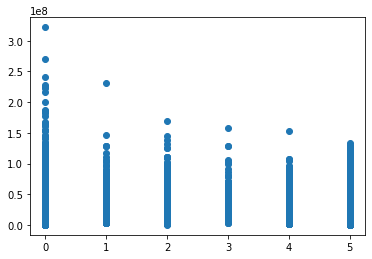

In [145]:
plt.scatter(df['단가_cluster'], df['취급액'])

In [115]:
df['판매단가'].describe()

count    3.537800e+04
mean     3.878541e+05
std      6.264218e+05
min      1.280000e+04
25%      5.900000e+04
50%      9.900000e+04
75%      3.990000e+05
max      7.930000e+06
Name: 판매단가, dtype: float64

In [41]:
conditionlist = [
    (df['판매단가'] <= 59000) ,
    (df['판매단가'] > 59000) & (df['판매단가'] <=99000),
    (df['판매단가'] > 99000) & (df['판매단가'] <=399000),
    (df['판매단가'] > 399000)]
choicelist = ['1','2','3','4']
df['판매단가_Range'] = np.select(conditionlist, choicelist, default='Not Specified')

In [38]:
df = df.astype({'판매단가_Range': 'int'})

In [42]:
df

,상품군,상품소분류,브랜드명,판매단가,취급액,판매수량,방송시간대,방송분대,요일,노출시간,...,조기마감여부,월,계절,시간대,판매수량시간등급수능,판매수량시간등급사분위수,노출빈도여부,디테일여부,평균기온,판매단가_Range
0,의류,상의,테이트,39900,2099000,52.606516,6,0,화요일,20,...,0,1,겨울,오전,B,B,0,0,-3.70,1
1,의류,상의,테이트,39900,4371000,109.548872,6,0,화요일,20,...,0,1,겨울,오전,B,B,0,0,-3.70,1
2,의류,상의,테이트,39900,3262000,81.754386,6,20,화요일,20,...,0,1,겨울,오전,B,B,0,0,-3.71,1
3,의류,상의,테이트,39900,6955000,174.310777,6,20,화요일,20,...,0,1,겨울,오전,B,B,0,0,-3.71,1
4,의류,상의,테이트,39900,6672000,167.218045,6,40,화요일,20,...,0,1,겨울,오전,B,B,0,1,-3.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35373,주방,밥솥,쿠첸,148000,1664000,11.243243,23,20,화요일,20,...,0,12,겨울,저녁,C,C,0,0,-4.94,3
35374,주방,밥솥,쿠첸,178000,9149000,51.398876,23,40,화요일,20,...,0,12,겨울,저녁,C,C,0,1,-4.94,3
35375,주방,밥솥,쿠첸,158000,2328000,14.734177,23,40,화요일,20,...,0,12,겨울,저녁,C,C,0,1,-4.94,3
35376,주방,밥솥,쿠첸,168000,15282000,90.964286,23,40,화요일,20,...,0,12,겨울,저녁,C,C,0,1,-4.94,3


In [6]:
df.columns

Index(['상품군', '상품소분류', '브랜드명', '판매단가', '취급액', '판매수량', '방송시간대', '방송분대', '요일',
       '노출시간', '최대시청률', '조기마감여부', '월', '계절', '시간대', '판매수량시간등급수능',
       '판매수량시간등급사분위수', '노출빈도여부', '디테일여부', '평균기온'],
      dtype='object')

In [8]:
df['최대시청률'].describe()

count    35378.000000
mean         0.017881
std          0.023141
min          0.000000
25%          0.000000
50%          0.014000
75%          0.027000
max          0.812000
Name: 최대시청률, dtype: float64

<AxesSubplot:xlabel='최대시청률'>

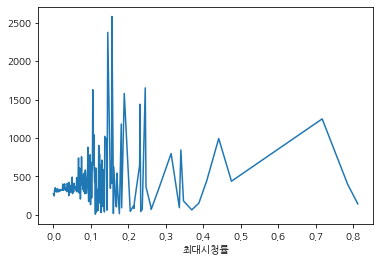

In [14]:
df.groupby('최대시청률')['판매수량'].mean().plot()

In [18]:
df.groupby('상품군')['최대시청률'].mean()

상품군
가구      0.017560
가전      0.015972
건강기능    0.012738
농수축     0.021056
생활용품    0.018031
속옷      0.015784
의류      0.017720
이미용     0.014680
잡화      0.023132
주방      0.017642
침구      0.013569
Name: 최대시청률, dtype: float64

In [19]:
df.groupby('상품소분류')['최대시청률'].mean()

상품소분류
TV       0.017659
가구세트     0.055154
가스레인지    0.011242
건강기능     0.012738
건조기      0.012737
           ...   
테이블      0.023667
프라이어     0.029351
하의       0.017552
핸드백      0.024641
행주       0.008368
Name: 최대시청률, Length: 79, dtype: float64

In [22]:
df['상품소분류'].value_counts()

밥솥      2977
TV      2290
아우터     2202
수산      2035
여성속옷    1627
        ... 
양산        12
공구        10
스타일러       7
낚시용품       6
식기         1
Name: 상품소분류, Length: 79, dtype: int64

<AxesSubplot:xlabel='상품소분류'>

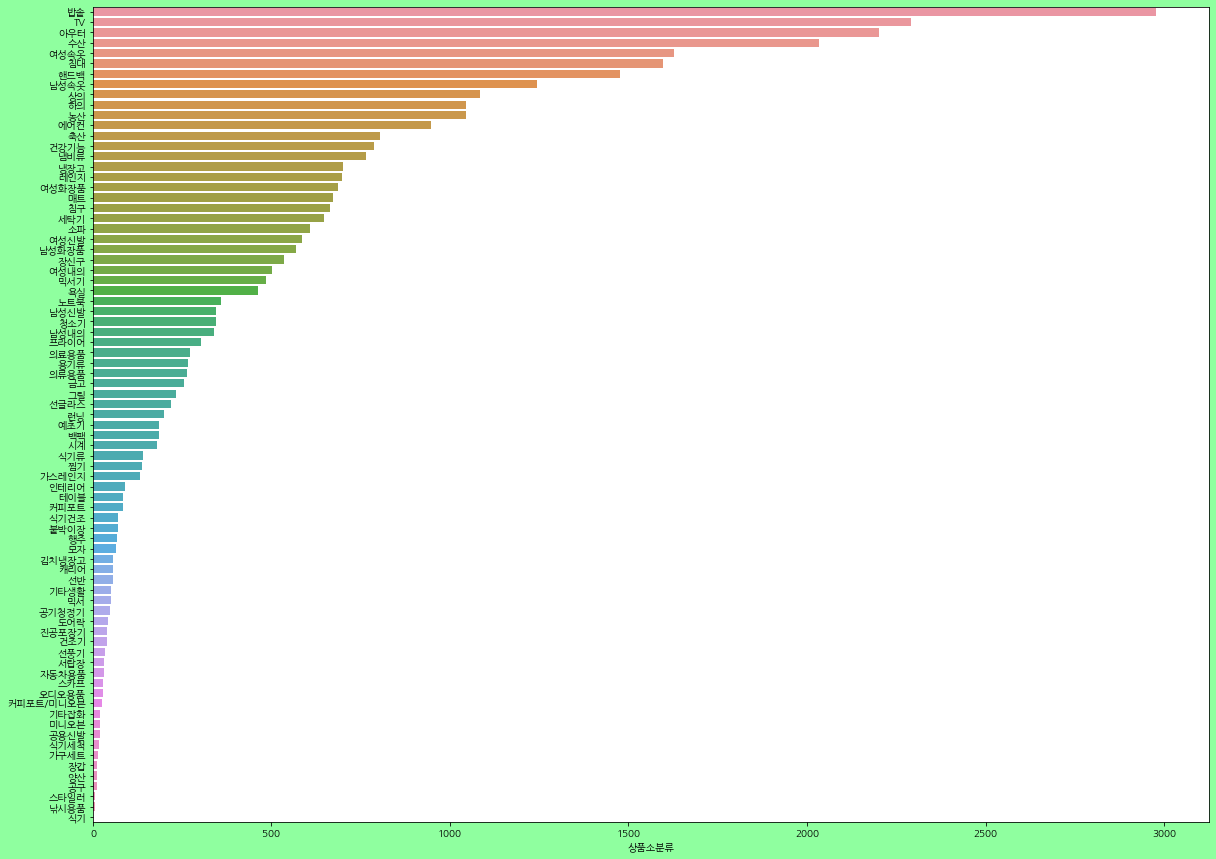

In [20]:
# 상품 소분류별 등장 빈도수
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('xkcd:mint green')
sns.barplot(y=df['상품소분류'].value_counts().index,x=df['상품소분류'].value_counts())
#plt.tight_layout()

<AxesSubplot:xlabel='월', ylabel='count'>

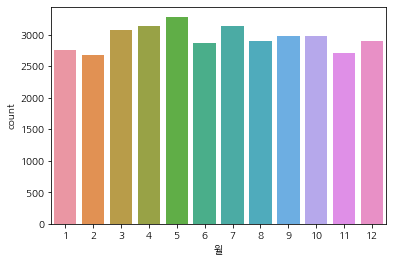

In [28]:
sns.countplot(df['월'])

<AxesSubplot:xlabel='상품군', ylabel='최대시청률'>

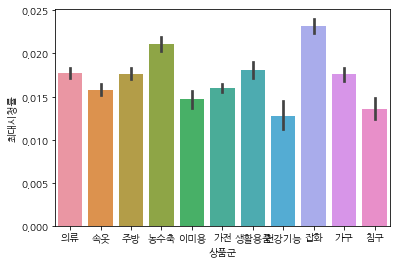

In [30]:
sns.barplot(x = '상품군', y = '최대시청률',data = df)

<AxesSubplot:xlabel='방송시간대', ylabel='판매수량'>

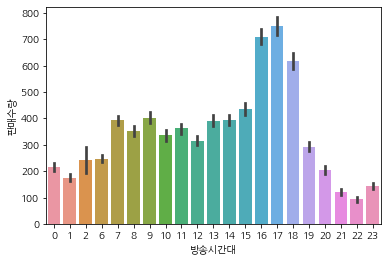

In [33]:
sns.barplot(data = df, x = '방송시간대', y = '판매수량')

<AxesSubplot:xlabel='방송시간대', ylabel='최대시청률'>

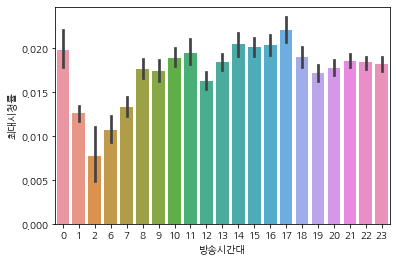

In [34]:
sns.barplot(data = df, x = '방송시간대', y = '최대시청률')

<AxesSubplot:xlabel='요일', ylabel='최대시청률'>

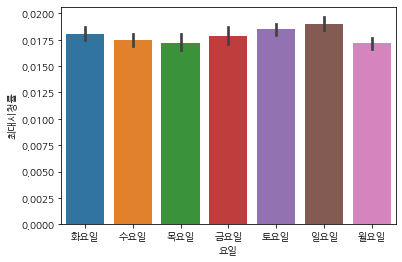

In [48]:
sns.barplot(data = df, x = '요일', y = '최대시청률')

In [47]:
df.groupby('판매단가_Range')['판매수량'].mean()

판매단가_Range
1    745.598753
2    342.225080
3    126.042722
4     18.723631
Name: 판매수량, dtype: float64

<AxesSubplot:xlabel='판매단가_Range', ylabel='판매수량'>

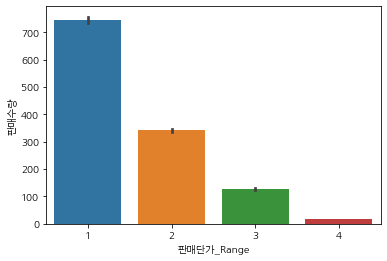

In [46]:
sns.barplot(data = df, x= '판매단가_Range', y = '판매수량')

In [64]:
df['상품군'].value_counts()

주방      6567
가전      5163
의류      4331
속옷      3910
농수축     3884
잡화      3695
생활용품    2771
가구      2302
이미용     1305
건강기능     786
침구       664
Name: 상품군, dtype: int64

In [51]:
df['최대시청률'].describe()

count    35378.000000
mean         0.017881
std          0.023141
min          0.000000
25%          0.000000
50%          0.014000
75%          0.027000
max          0.812000
Name: 최대시청률, dtype: float64

In [60]:
df_drop = df[df['최대시청률']==0].index
df_droped = df.drop(df_drop)
df_droped

,상품군,상품소분류,브랜드명,판매단가,취급액,판매수량,방송시간대,방송분대,요일,노출시간,...,조기마감여부,월,계절,시간대,판매수량시간등급수능,판매수량시간등급사분위수,노출빈도여부,디테일여부,평균기온,판매단가_Range
11,의류,하의,CERINI,59900,53542000,893.856427,8,40,화요일,20,...,0,1,겨울,오전,B,B,0,1,-3.230,2
13,의류,아우터,보코,79000,25628000,324.405063,9,20,화요일,20,...,0,1,겨울,오전,B,A,0,0,-2.090,2
14,의류,아우터,보코,79000,49270000,623.670886,9,40,화요일,20,...,0,1,겨울,오전,B,A,0,1,-2.090,2
15,의류,상의,CERINI,79900,48799000,610.750939,10,0,화요일,20,...,0,1,겨울,오전,B,A,0,0,-1.430,2
16,의류,상의,CERINI,79900,97907000,1225.369212,10,20,화요일,20,...,0,1,겨울,오전,B,A,0,0,-0.795,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35369,가전,냉장고,LG,1359000,72733000,53.519500,22,0,화요일,20,...,0,12,겨울,저녁,C,C,1,1,-4.790,4
35374,주방,밥솥,쿠첸,178000,9149000,51.398876,23,40,화요일,20,...,0,12,겨울,저녁,C,C,0,1,-4.940,3
35375,주방,밥솥,쿠첸,158000,2328000,14.734177,23,40,화요일,20,...,0,12,겨울,저녁,C,C,0,1,-4.940,3
35376,주방,밥솥,쿠첸,168000,15282000,90.964286,23,40,화요일,20,...,0,12,겨울,저녁,C,C,0,1,-4.940,3


In [61]:
df_droped['최대시청률'].describe()

count    24000.000000
mean         0.026359
std          0.023790
min          0.002000
25%          0.013000
50%          0.021000
75%          0.034000
max          0.812000
Name: 최대시청률, dtype: float64

In [71]:
df['최대시청률'].describe()

count    35378.000000
mean         0.017881
std          0.023141
min          0.000000
25%          0.000000
50%          0.014000
75%          0.027000
max          0.812000
Name: 최대시청률, dtype: float64

In [72]:
df.columns

Index(['상품군', '상품소분류', '브랜드명', '판매단가', '취급액', '판매수량', '방송시간대', '방송분대', '요일',
       '노출시간', '최대시청률', '조기마감여부', '월', '계절', '시간대', '판매수량시간등급수능',
       '판매수량시간등급사분위수', '노출빈도여부', '디테일여부', '평균기온', '판매단가_Range'],
      dtype='object')

In [78]:
df.groupby(['상품군','요일'])['판매수량'].mean()

상품군  요일 
가구   금요일     20.478509
     목요일     21.614197
     수요일     17.157299
     월요일     19.445281
     일요일     19.268710
               ...    
침구   수요일    118.348401
     월요일    162.781701
     일요일    172.002816
     토요일    322.995400
     화요일    137.945299
Name: 판매수량, Length: 77, dtype: float64

<AxesSubplot:xlabel='상품군', ylabel='판매수량'>

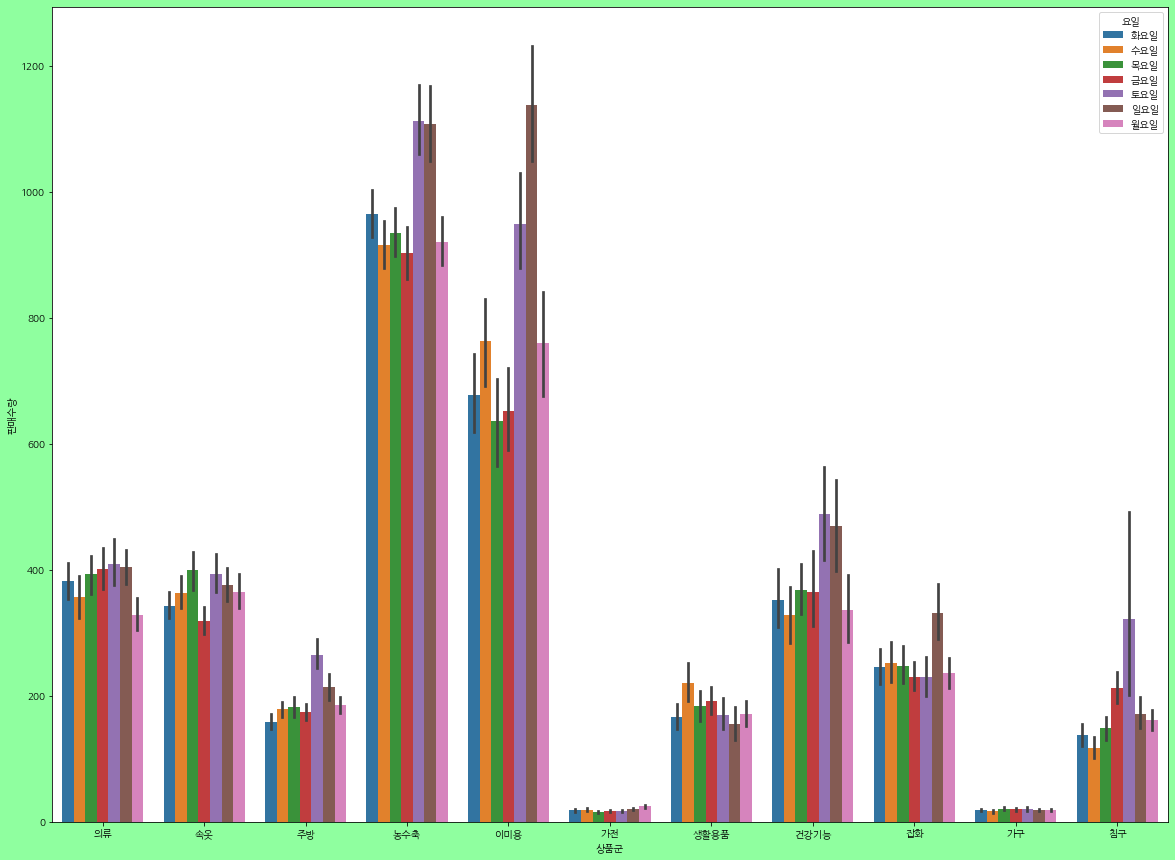

In [80]:
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('xkcd:mint green')
sns.barplot(data = df, x = '상품군', y = '판매수량', hue = '요일')

# test 셋과 비슷한 row들에 대한 변수 추가

In [9]:
df1['방송일시'] = df1['방송일시'].astype('datetime64[ns]')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38300 entries, 0 to 38299
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   방송일시      38300 non-null  datetime64[ns]
 1   방송일시.1    38300 non-null  object        
 2   노출.분.     21519 non-null  float64       
 3   마더코드      38300 non-null  int64         
 4   상품코드      38300 non-null  int64         
 5   상품명       38300 non-null  object        
 6   상품군       38300 non-null  object        
 7   상품소분류     38300 non-null  object        
 8   브랜드       38300 non-null  object        
 9   판매단가      38300 non-null  int64         
 10  취급액       38300 non-null  int64         
 11  판매수량      38300 non-null  float64       
 12  group     38300 non-null  int64         
 13  시간        38300 non-null  int64         
 14  분         38300 non-null  int64         
 15  요일        38300 non-null  object        
 16  요일1       38300 non-null  int64         
 17  노출시간      38

In [10]:
df1.rename({'시간등급_수능':'시간대_수능', '시간등급_사분위':'시간대_사분위'}, axis = 1, inplace = True)

In [11]:
df1['방송일시'] = df1['방송일시'].astype('datetime64[ns]')

In [12]:
df3 = df2[(df2['방송일시'].isin(df1['방송일시']) == True) & 
   (df2['상품코드'].isin(df1['상품코드']) == True) & (df2['취급액'].isin(df1['취급액']) == True)]

In [13]:
df4 = df[(df1['상품코드'].isin(df2['상품코드'])) & (df1['방송일시'].isin(df2['방송일시'])) & (df1['취급액'].isin(df2['취급액']))]

In [14]:
df4

,date,exposure,mot_code,product_code,product_name,group,product_detail,brand,price,tot_price,...,ratings,early,month,season,day_night,group_time1,group_time2,group_exposure,detail,temperature
32,2019-01-01 16:00:00,20,100322,201479,국내산 손질갑오징어 8팩,농수축,수산,노브랜드,49900,60787000,...,0.037,0,1,겨울,오후,A,S,1,0,1.390
33,2019-01-01 16:20:00,20,100322,201479,국내산 손질갑오징어 8팩,농수축,수산,노브랜드,49900,115457000,...,0.005,0,1,겨울,오후,A,S,1,1,1.015
34,2019-01-01 16:40:00,20,100849,202512,멋진밥상 흥양농협 햅쌀 20kg,농수축,농산,멋진밥상,61000,83893000,...,0.031,0,1,겨울,오후,A,S,0,0,1.015
35,2019-01-01 17:00:00,20,100074,200197,비버리힐스폴로클럽 남성기초세트(2018FW골드),이미용,남성화장품,비버리힐스폴로클럽,39800,42239000,...,0.014,0,1,겨울,오후,S,S,0,0,0.640
36,2019-01-01 17:20:00,20,100074,200197,비버리힐스폴로클럽 남성기초세트(2018FW골드),이미용,남성화장품,비버리힐스폴로클럽,39800,73494000,...,0.012,0,1,겨울,오후,S,S,0,0,0.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38286,2019-12-31 21:40:00,20,100155,200556,일시불 LG전자 매직스페이스 냉장고,가전,냉장고,LG,1359000,43700000,...,0.028,0,12,겨울,저녁,C,C,1,0,-4.595
38287,2019-12-31 22:00:00,20,100155,200489,무이자 LG전자 매직스페이스 냉장고,가전,냉장고,LG,1499000,32184000,...,0.012,0,12,겨울,저녁,C,C,1,1,-4.790
38288,2019-12-31 22:00:00,20,100155,200556,일시불 LG전자 매직스페이스 냉장고,가전,냉장고,LG,1359000,72733000,...,0.012,0,12,겨울,저녁,C,C,1,1,-4.790
38292,2019-12-31 23:20:00,20,100448,201383,무이자쿠첸압력밥솥 10인용,주방,밥솥,쿠첸,178000,4573000,...,0.000,0,12,겨울,저녁,C,C,0,0,-4.940


In [15]:
idx1 = df4.index

In [16]:
new_index = pd.Int64Index(np.arange(len(df))).difference(idx1)

In [17]:
df5 = df.iloc[new_index]

In [18]:
df5['test'] = 0
df4['test'] = 1

<ipython-input-18-f1cf9baa97e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['test'] = 0
<ipython-input-18-f1cf9baa97e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['test'] = 1


In [19]:
df5

,date,exposure,mot_code,product_code,product_name,group,product_detail,brand,price,tot_price,...,early,month,season,day_night,group_time1,group_time2,group_exposure,detail,temperature,test
0,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,상의,테이트,39900,2099000,...,0,1,겨울,오전,B,B,0,0,-3.70,0
1,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,의류,상의,테이트,39900,4371000,...,0,1,겨울,오전,B,B,0,0,-3.70,0
2,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,상의,테이트,39900,3262000,...,0,1,겨울,오전,B,B,0,0,-3.71,0
3,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,의류,상의,테이트,39900,6955000,...,0,1,겨울,오전,B,B,0,0,-3.71,0
4,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,상의,테이트,39900,6672000,...,0,1,겨울,오전,B,B,0,1,-3.71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38294,2019-12-31 23:20:00,20,100448,201390,일시불쿠첸압력밥솥 10인용,주방,밥솥,쿠첸,168000,9129000,...,0,12,겨울,저녁,C,C,0,0,-4.94,0
38295,2019-12-31 23:20:00,20,100448,201391,일시불쿠첸압력밥솥 6인용,주방,밥솥,쿠첸,148000,1664000,...,0,12,겨울,저녁,C,C,0,0,-4.94,0
38297,2019-12-31 23:40:00,20,100448,201384,무이자쿠첸압력밥솥 6인용,주방,밥솥,쿠첸,158000,2328000,...,0,12,겨울,저녁,C,C,0,1,-4.94,0
38298,2019-12-31 23:40:00,20,100448,201390,일시불쿠첸압력밥솥 10인용,주방,밥솥,쿠첸,168000,15282000,...,0,12,겨울,저녁,C,C,0,1,-4.94,0


In [20]:
df4.reset_index(inplace = True)
df5.reset_index(inplace = True)

In [21]:
x = pd.concat([df4,df5],axis = 0)
x

,index,date,exposure,mot_code,product_code,product_name,group,product_detail,brand,price,...,early,month,season,day_night,group_time1,group_time2,group_exposure,detail,temperature,test
0,32,2019-01-01 16:00:00,20,100322,201479,국내산 손질갑오징어 8팩,농수축,수산,노브랜드,49900,...,0,1,겨울,오후,A,S,1,0,1.390,1
1,33,2019-01-01 16:20:00,20,100322,201479,국내산 손질갑오징어 8팩,농수축,수산,노브랜드,49900,...,0,1,겨울,오후,A,S,1,1,1.015,1
2,34,2019-01-01 16:40:00,20,100849,202512,멋진밥상 흥양농협 햅쌀 20kg,농수축,농산,멋진밥상,61000,...,0,1,겨울,오후,A,S,0,0,1.015,1
3,35,2019-01-01 17:00:00,20,100074,200197,비버리힐스폴로클럽 남성기초세트(2018FW골드),이미용,남성화장품,비버리힐스폴로클럽,39800,...,0,1,겨울,오후,S,S,0,0,0.640,1
4,36,2019-01-01 17:20:00,20,100074,200197,비버리힐스폴로클럽 남성기초세트(2018FW골드),이미용,남성화장품,비버리힐스폴로클럽,39800,...,0,1,겨울,오후,S,S,0,0,0.285,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23876,38294,2019-12-31 23:20:00,20,100448,201390,일시불쿠첸압력밥솥 10인용,주방,밥솥,쿠첸,168000,...,0,12,겨울,저녁,C,C,0,0,-4.940,0
23877,38295,2019-12-31 23:20:00,20,100448,201391,일시불쿠첸압력밥솥 6인용,주방,밥솥,쿠첸,148000,...,0,12,겨울,저녁,C,C,0,0,-4.940,0
23878,38297,2019-12-31 23:40:00,20,100448,201384,무이자쿠첸압력밥솥 6인용,주방,밥솥,쿠첸,158000,...,0,12,겨울,저녁,C,C,0,1,-4.940,0
23879,38298,2019-12-31 23:40:00,20,100448,201390,일시불쿠첸압력밥솥 10인용,주방,밥솥,쿠첸,168000,...,0,12,겨울,저녁,C,C,0,1,-4.940,0


In [193]:
x.drop(columns = ['index'],inplace = True)
x

,exposure,mot_code,product_code,product_name,group,product_detail,brand,price,tot_price,sales,...,early,month,season,day_night,group_time1,group_time2,group_exposure,detail,temperature,test
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 16:00:00,20,100322,201479,국내산 손질갑오징어 8팩,농수축,수산,노브랜드,49900,60787000,1218.176353,...,0,1,겨울,오후,A,S,1,0,1.390,1
2019-01-01 16:20:00,20,100322,201479,국내산 손질갑오징어 8팩,농수축,수산,노브랜드,49900,115457000,2313.767535,...,0,1,겨울,오후,A,S,1,1,1.015,1
2019-01-01 16:40:00,20,100849,202512,멋진밥상 흥양농협 햅쌀 20kg,농수축,농산,멋진밥상,61000,83893000,1375.295082,...,0,1,겨울,오후,A,S,0,0,1.015,1
2019-01-01 17:00:00,20,100074,200197,비버리힐스폴로클럽 남성기초세트(2018FW골드),이미용,남성화장품,비버리힐스폴로클럽,39800,42239000,1061.281407,...,0,1,겨울,오후,S,S,0,0,0.640,1
2019-01-01 17:20:00,20,100074,200197,비버리힐스폴로클럽 남성기초세트(2018FW골드),이미용,남성화장품,비버리힐스폴로클럽,39800,73494000,1846.582915,...,0,1,겨울,오후,S,S,0,0,0.285,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:20:00,20,100448,201390,일시불쿠첸압력밥솥 10인용,주방,밥솥,쿠첸,168000,9129000,54.339286,...,0,12,겨울,저녁,C,C,0,0,-4.940,0
2019-12-31 23:20:00,20,100448,201391,일시불쿠첸압력밥솥 6인용,주방,밥솥,쿠첸,148000,1664000,11.243243,...,0,12,겨울,저녁,C,C,0,0,-4.940,0
2019-12-31 23:40:00,20,100448,201384,무이자쿠첸압력밥솥 6인용,주방,밥솥,쿠첸,158000,2328000,14.734177,...,0,12,겨울,저녁,C,C,0,1,-4.940,0


In [22]:
x.set_index('date',inplace = True)
x

,index,exposure,mot_code,product_code,product_name,group,product_detail,brand,price,tot_price,...,early,month,season,day_night,group_time1,group_time2,group_exposure,detail,temperature,test
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 16:00:00,32,20,100322,201479,국내산 손질갑오징어 8팩,농수축,수산,노브랜드,49900,60787000,...,0,1,겨울,오후,A,S,1,0,1.390,1
2019-01-01 16:20:00,33,20,100322,201479,국내산 손질갑오징어 8팩,농수축,수산,노브랜드,49900,115457000,...,0,1,겨울,오후,A,S,1,1,1.015,1
2019-01-01 16:40:00,34,20,100849,202512,멋진밥상 흥양농협 햅쌀 20kg,농수축,농산,멋진밥상,61000,83893000,...,0,1,겨울,오후,A,S,0,0,1.015,1
2019-01-01 17:00:00,35,20,100074,200197,비버리힐스폴로클럽 남성기초세트(2018FW골드),이미용,남성화장품,비버리힐스폴로클럽,39800,42239000,...,0,1,겨울,오후,S,S,0,0,0.640,1
2019-01-01 17:20:00,36,20,100074,200197,비버리힐스폴로클럽 남성기초세트(2018FW골드),이미용,남성화장품,비버리힐스폴로클럽,39800,73494000,...,0,1,겨울,오후,S,S,0,0,0.285,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:20:00,38294,20,100448,201390,일시불쿠첸압력밥솥 10인용,주방,밥솥,쿠첸,168000,9129000,...,0,12,겨울,저녁,C,C,0,0,-4.940,0
2019-12-31 23:20:00,38295,20,100448,201391,일시불쿠첸압력밥솥 6인용,주방,밥솥,쿠첸,148000,1664000,...,0,12,겨울,저녁,C,C,0,0,-4.940,0
2019-12-31 23:40:00,38297,20,100448,201384,무이자쿠첸압력밥솥 6인용,주방,밥솥,쿠첸,158000,2328000,...,0,12,겨울,저녁,C,C,0,1,-4.940,0


In [25]:
x.sort_index(inplace = True)
x

,index,exposure,mot_code,product_code,product_name,group,product_detail,brand,price,tot_price,...,early,month,season,day_night,group_time1,group_time2,group_exposure,detail,temperature,test
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 06:00:00,0,20,100346,201072,테이트 남성 셀린니트3종,의류,상의,테이트,39900,2099000,...,0,1,겨울,오전,B,B,0,0,-3.70,0
2019-01-01 06:00:00,1,20,100346,201079,테이트 여성 셀린니트3종,의류,상의,테이트,39900,4371000,...,0,1,겨울,오전,B,B,0,0,-3.70,0
2019-01-01 06:20:00,3,20,100346,201079,테이트 여성 셀린니트3종,의류,상의,테이트,39900,6955000,...,0,1,겨울,오전,B,B,0,0,-3.71,0
2019-01-01 06:20:00,2,20,100346,201072,테이트 남성 셀린니트3종,의류,상의,테이트,39900,3262000,...,0,1,겨울,오전,B,B,0,0,-3.71,0
2019-01-01 06:40:00,4,20,100346,201072,테이트 남성 셀린니트3종,의류,상의,테이트,39900,6672000,...,0,1,겨울,오전,B,B,0,1,-3.71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:20:00,38293,20,100448,201384,무이자쿠첸압력밥솥 6인용,주방,밥솥,쿠첸,158000,620000,...,0,12,겨울,저녁,C,C,0,0,-4.94,0
2019-12-31 23:40:00,38296,20,100448,201383,무이자쿠첸압력밥솥 10인용,주방,밥솥,쿠첸,178000,9149000,...,0,12,겨울,저녁,C,C,0,1,-4.94,1
2019-12-31 23:40:00,38298,20,100448,201390,일시불쿠첸압력밥솥 10인용,주방,밥솥,쿠첸,168000,15282000,...,0,12,겨울,저녁,C,C,0,1,-4.94,0


In [26]:
x.to_excel('df_on_test.xlsx',index = False)